In [1]:
# Lab 7 Learning rate and Evaluation
import tensorflow as tf
tf.set_random_seed(777)  # for reproducibility

x_data = [[1, 2, 1],
          [1, 3, 2],
          [1, 3, 4],
          [1, 5, 5],
          [1, 7, 5],
          [1, 2, 5],
          [1, 6, 6],
          [1, 7, 7]]
y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]


# Evaluation our model using this test dataset
x_test = [[2, 1, 1],
          [3, 1, 2],
          [3, 3, 4]]
y_test = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1]]

X = tf.placeholder("float", [None, 3]) # Train, column은 3개
Y = tf.placeholder("float", [None, 3]) # Test, column은 3개

W = tf.Variable(tf.random_normal([3, 3]))
b = tf.Variable(tf.random_normal([3]))

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
# Try to change learning_rate to small numbers
optimizer = tf.train.GradientDescentOptimizer(
    learning_rate=1e-10).minimize(cost)
# learning rate를 정말 작게 주어서 학습이 전혀 되지 않았다. 나중에 바꿔서 하면 됨
# local minimum에 빠졌다.

# Correct prediction Test model
prediction = tf.arg_max(hypothesis, 1)
is_correct = tf.equal(prediction, tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(201):
        cost_val, W_val, _ = sess.run(
            [cost, W, optimizer], feed_dict={X: x_data, Y: y_data})
        print(step, cost_val, W_val)

    # predict
    # Test data를 던졌을 때 예측하는 것이다.
    print("Prediction:", sess.run(prediction, feed_dict={X: x_test}))
    # Calculate the accuracy
    # 실제 y값과 비교
    print("Accuracy: ", sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))

'''
when lr = 1.5
0 5.73203 [[-0.30548954  1.22985029 -0.66033536]
 [-4.39069986  2.29670858  2.99386835]
 [-3.34510708  2.09743214 -0.80419564]]
1 23.1494 [[ 0.06951046  0.29449689 -0.0999819 ]
 [-1.95319986 -1.63627958  4.48935604]
 [-0.90760708 -1.65020132  0.50593793]]
2 27.2798 [[ 0.44451016  0.85699677 -1.03748143]
 [ 0.48429942  0.98872018 -0.57314301]
 [ 1.52989244  1.16229868 -4.74406147]]
3 8.668 [[ 0.12396193  0.61504567 -0.47498202]
 [ 0.22003263 -0.2470119   0.9268558 ]
 [ 0.96035379  0.41933775 -3.43156195]]
4 5.77111 [[-0.9524312   1.13037777  0.08607888]
 [-3.78651619  2.26245379  2.42393875]
 [-3.07170963  3.14037919 -2.12054014]]
5 inf [[ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]]
6 nan [[ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]]

 ...
Prediction: [0 0 0]
Accuracy:  0.0

-------------------------------------------------
When lr = 1e-10
0 5.73203 [[ 0.80269563  0.67861295 -1.21728313]
 [-0.3051686  -0.3032113   1.50825703]
 [ 0.75722361 -0.7008909  -2.10820389]]
1 5.73203 [[ 0.80269563  0.67861295 -1.21728313]
 [-0.3051686  -0.3032113   1.50825703]
 [ 0.75722361 -0.7008909  -2.10820389]]
2 5.73203 [[ 0.80269563  0.67861295 -1.21728313]
 [-0.3051686  -0.3032113   1.50825703]
 [ 0.75722361 -0.7008909  -2.10820389]]
...

198 5.73203 [[ 0.80269563  0.67861295 -1.21728313]
 [-0.3051686  -0.3032113   1.50825703]
 [ 0.75722361 -0.7008909  -2.10820389]]
199 5.73203 [[ 0.80269563  0.67861295 -1.21728313]
 [-0.3051686  -0.3032113   1.50825703]
 [ 0.75722361 -0.7008909  -2.10820389]]
200 5.73203 [[ 0.80269563  0.67861295 -1.21728313]
 [-0.3051686  -0.3032113   1.50825703]
 [ 0.75722361 -0.7008909  -2.10820389]]
Prediction: [0 0 0]
Accuracy:  0.0
-------------------------------------------------
When lr = 0.1

0 5.73203 [[ 0.72881663  0.71536207 -1.18015325]
 [-0.57753736 -0.12988332  1.60729778]
 [ 0.48373488 -0.51433605 -2.02127004]]
1 3.318 [[ 0.66219079  0.74796319 -1.14612854]
 [-0.81948912  0.03000021  1.68936598]
 [ 0.23214608 -0.33772916 -1.94628811]]
2 2.0218 [[ 0.64342022  0.74127686 -1.12067163]
 [-0.81161296 -0.00900121  1.72049117]
 [ 0.2086665  -0.35079569 -1.909742  ]]

...

199 0.672261 [[-1.15377033  0.28146935  1.13632679]
 [ 0.37484586  0.18958236  0.33544877]
 [-0.35609841 -0.43973011 -1.25604188]]
200 0.670909 [[-1.15885413  0.28058422  1.14229572]
 [ 0.37609792  0.19073224  0.33304682]
 [-0.35536593 -0.44033223 -1.2561723 ]]
Prediction: [2 2 2]
Accuracy:  1.0
'''


Instructions for updating:
Use `argmax` instead
0 5.73203 [[ 0.80269563  0.67861295 -1.21728313]
 [-0.3051686  -0.3032113   1.50825703]
 [ 0.75722361 -0.7008909  -2.10820389]]
1 5.73203 [[ 0.80269563  0.67861295 -1.21728313]
 [-0.3051686  -0.3032113   1.50825703]
 [ 0.75722361 -0.7008909  -2.10820389]]
2 5.73203 [[ 0.80269563  0.67861295 -1.21728313]
 [-0.3051686  -0.3032113   1.50825703]
 [ 0.75722361 -0.7008909  -2.10820389]]
3 5.73203 [[ 0.80269563  0.67861295 -1.21728313]
 [-0.3051686  -0.3032113   1.50825703]
 [ 0.75722361 -0.7008909  -2.10820389]]
4 5.73203 [[ 0.80269563  0.67861295 -1.21728313]
 [-0.3051686  -0.3032113   1.50825703]
 [ 0.75722361 -0.7008909  -2.10820389]]
5 5.73203 [[ 0.80269563  0.67861295 -1.21728313]
 [-0.3051686  -0.3032113   1.50825703]
 [ 0.75722361 -0.7008909  -2.10820389]]
6 5.73203 [[ 0.80269563  0.67861295 -1.21728313]
 [-0.3051686  -0.3032113   1.50825703]
 [ 0.75722361 -0.7008909  -2.10820389]]
7 5.73203 [[ 0.80269563  0.67861295 -1.21728313]
 [-0.30

 [ 0.75722361 -0.7008909  -2.10820389]]
95 5.73203 [[ 0.80269563  0.67861295 -1.21728313]
 [-0.3051686  -0.3032113   1.50825703]
 [ 0.75722361 -0.7008909  -2.10820389]]
96 5.73203 [[ 0.80269563  0.67861295 -1.21728313]
 [-0.3051686  -0.3032113   1.50825703]
 [ 0.75722361 -0.7008909  -2.10820389]]
97 5.73203 [[ 0.80269563  0.67861295 -1.21728313]
 [-0.3051686  -0.3032113   1.50825703]
 [ 0.75722361 -0.7008909  -2.10820389]]
98 5.73203 [[ 0.80269563  0.67861295 -1.21728313]
 [-0.3051686  -0.3032113   1.50825703]
 [ 0.75722361 -0.7008909  -2.10820389]]
99 5.73203 [[ 0.80269563  0.67861295 -1.21728313]
 [-0.3051686  -0.3032113   1.50825703]
 [ 0.75722361 -0.7008909  -2.10820389]]
100 5.73203 [[ 0.80269563  0.67861295 -1.21728313]
 [-0.3051686  -0.3032113   1.50825703]
 [ 0.75722361 -0.7008909  -2.10820389]]
101 5.73203 [[ 0.80269563  0.67861295 -1.21728313]
 [-0.3051686  -0.3032113   1.50825703]
 [ 0.75722361 -0.7008909  -2.10820389]]
102 5.73203 [[ 0.80269563  0.67861295 -1.21728313]
 [-0

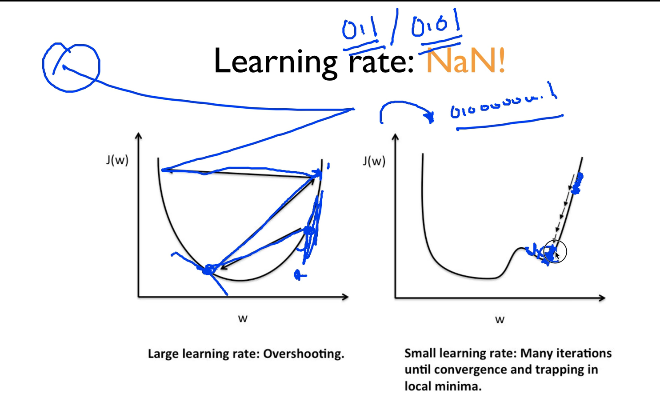

In [2]:
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # for reproducibility


xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([4, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(101):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)


'''
0 Cost:  2.45533e+12
Prediction:
 [[-1104436.375]
 [-2224342.75 ]
 [-1749606.75 ]
 [-1226179.375]
 [-1445287.125]
 [-1457459.5  ]
 [-1335740.5  ]
 [-1700924.625]]
1 Cost:  2.69762e+27
Prediction:
 [[  3.66371490e+13]
 [  7.37543360e+13]
 [  5.80198785e+13]
 [  4.06716290e+13]
 [  4.79336847e+13]
 [  4.83371348e+13]
 [  4.43026590e+13]
 [  5.64060907e+13]]
2 Cost:  inf
Prediction:
 [[ -1.21438790e+21]
 [ -2.44468702e+21]
 [ -1.92314724e+21]
 [ -1.34811610e+21]
 [ -1.58882674e+21]
 [ -1.60219962e+21]
 [ -1.46847142e+21]
 [ -1.86965602e+21]]
3 Cost:  inf
Prediction:
 [[  4.02525216e+28]
 [  8.10324465e+28]
 [  6.37453079e+28]
 [  4.46851237e+28]
 [  5.26638074e+28]
 [  5.31070676e+28]
 [  4.86744608e+28]
 [  6.19722623e+28]]
4 Cost:  inf
Prediction:
 [[ -1.33422428e+36]
 [ -2.68593010e+36]
 [ -2.11292430e+36]
 [ -1.48114879e+36]
 [ -1.74561303e+36]
 [ -1.76030542e+36]
 [ -1.61338091e+36]
 [ -2.05415459e+36]]
5 Cost:  inf
Prediction:
 [[ inf]
 [ inf]
 [ inf]
 [ inf]
 [ inf]
 [ inf]
 [ inf]
 [ inf]]
6 Cost:  nan
Prediction:
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
'''


0 Cost:  3.56575e+12 
Prediction:
 [[ 1332160.625]
 [ 2683092.   ]
 [ 2110422.5  ]
 [ 1479020.125]
 [ 1743324.25 ]
 [ 1758010.5  ]
 [ 1611181.375]
 [ 2051708.75 ]]
1 Cost:  3.91762e+27 
Prediction:
 [[ -4.41511691e+13]
 [ -8.88808334e+13]
 [ -6.99193455e+13]
 [ -4.90130930e+13]
 [ -5.77645461e+13]
 [ -5.82507372e+13]
 [ -5.33888175e+13]
 [ -6.79745809e+13]]
2 Cost:  inf 
Prediction:
 [[  1.46345019e+21]
 [  2.94607530e+21]
 [  2.31757123e+21]
 [  1.62460517e+21]
 [  1.91468399e+21]
 [  1.93079942e+21]
 [  1.76964458e+21]
 [  2.25310924e+21]]
3 Cost:  inf 
Prediction:
 [[ -4.85080305e+28]
 [ -9.76516442e+28]
 [ -7.68190236e+28]
 [ -5.38497259e+28]
 [ -6.34647804e+28]
 [ -6.39989509e+28]
 [ -5.86572508e+28]
 [ -7.46823417e+28]]
4 Cost:  inf 
Prediction:
 [[  1.60786425e+36]
 [  3.23679559e+36]
 [  2.54627018e+36]
 [  1.78492192e+36]
 [  2.10362576e+36]
 [  2.12133152e+36]
 [  1.94427384e+36]
 [  2.47544702e+36]]
5 Cost:  inf 
Prediction:
 [[-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]
 

86 Cost:  nan 
Prediction:
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
87 Cost:  nan 
Prediction:
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
88 Cost:  nan 
Prediction:
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
89 Cost:  nan 
Prediction:
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
90 Cost:  nan 
Prediction:
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
91 Cost:  nan 
Prediction:
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
92 Cost:  nan 
Prediction:
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
93 Cost:  nan 
Prediction:
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
94 Cost:  nan 
Prediction:
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
95 Cost:  nan 
Prediction:
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
96 Cost:  nan 
Prediction:
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [

'\n0 Cost:  2.45533e+12\nPrediction:\n [[-1104436.375]\n [-2224342.75 ]\n [-1749606.75 ]\n [-1226179.375]\n [-1445287.125]\n [-1457459.5  ]\n [-1335740.5  ]\n [-1700924.625]]\n1 Cost:  2.69762e+27\nPrediction:\n [[  3.66371490e+13]\n [  7.37543360e+13]\n [  5.80198785e+13]\n [  4.06716290e+13]\n [  4.79336847e+13]\n [  4.83371348e+13]\n [  4.43026590e+13]\n [  5.64060907e+13]]\n2 Cost:  inf\nPrediction:\n [[ -1.21438790e+21]\n [ -2.44468702e+21]\n [ -1.92314724e+21]\n [ -1.34811610e+21]\n [ -1.58882674e+21]\n [ -1.60219962e+21]\n [ -1.46847142e+21]\n [ -1.86965602e+21]]\n3 Cost:  inf\nPrediction:\n [[  4.02525216e+28]\n [  8.10324465e+28]\n [  6.37453079e+28]\n [  4.46851237e+28]\n [  5.26638074e+28]\n [  5.31070676e+28]\n [  4.86744608e+28]\n [  6.19722623e+28]]\n4 Cost:  inf\nPrediction:\n [[ -1.33422428e+36]\n [ -2.68593010e+36]\n [ -2.11292430e+36]\n [ -1.48114879e+36]\n [ -1.74561303e+36]\n [ -1.76030542e+36]\n [ -1.61338091e+36]\n [ -2.05415459e+36]]\n5 Cost:  inf\nPrediction:\n 

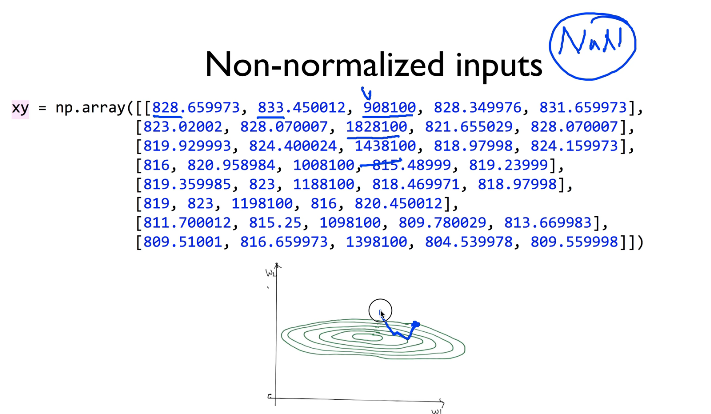

In [ ]:
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # for reproducibility


# 정규화를 하게 되면 이러한 문제가 사라진다.
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    # 0으로 나누는일이 없도록 설정
    return numerator / (denominator + 1e-7)


xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])
'''
input data가 Normalize되지 않았다.
input data를 보면 작은값과 큰값이 같이 들어가있는데 이러한 경우 학습하다가
튕겨져나갈 수가 있다. 그럴 경우 NaN이 표시될 수 있다.
'''

# very important. It does not work without it.
xy = MinMaxScaler(xy)
print(xy)

x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([4, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(101):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

'''
100 Cost:  0.152254
Prediction:
 [[ 1.63450289]
 [ 0.06628087]
 [ 0.35014752]
 [ 0.67070574]
 [ 0.61131608]
 [ 0.61466062]
 [ 0.23175186]
 [-0.13716528]]

'''


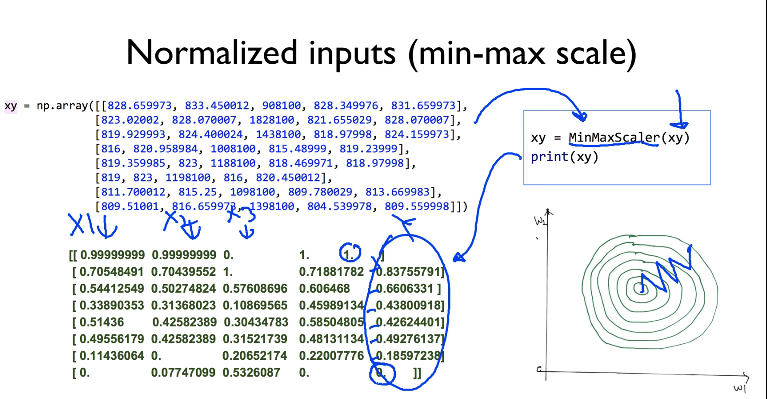

In [ ]:
# Lab 7 Learning rate and Evaluation
import tensorflow as tf
import random
import matplotlib.pyplot as plt
tf.set_random_seed(777)  # for reproducibility

from tensorflow.examples.tutorials.mnist import input_data
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

nb_classes = 10

# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Test model
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# parameters
training_epochs = 15
batch_size = 100

with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)

        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={
                            X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch

        print('Epoch:', '%04d' % (epoch + 1),
              'cost =', '{:.9f}'.format(avg_cost))

    print("Learning finished")

    # Test the model using test sets
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={
          X: mnist.test.images, Y: mnist.test.labels}))

    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
    print("Prediction: ", sess.run(
        tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

    plt.imshow(
        mnist.test.images[r:r + 1].reshape(28, 28),
        cmap='Greys',
        interpolation='nearest')
    plt.show()


'''
Epoch: 0001 cost = 2.868104637
Epoch: 0002 cost = 1.134684615
Epoch: 0003 cost = 0.908220728
Epoch: 0004 cost = 0.794199896
Epoch: 0005 cost = 0.721815854
Epoch: 0006 cost = 0.670184430
Epoch: 0007 cost = 0.630576546
Epoch: 0008 cost = 0.598888191
Epoch: 0009 cost = 0.573027079
Epoch: 0010 cost = 0.550497213
Epoch: 0011 cost = 0.532001859
Epoch: 0012 cost = 0.515517795
Epoch: 0013 cost = 0.501175288
Epoch: 0014 cost = 0.488425370
Epoch: 0015 cost = 0.476968593
Learning finished
Accuracy:  0.888
'''
